# Q5

## import libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt

## Xnor

In [21]:
#dataset and label
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y =np.array([1, 0, 0, 1])

Text(0, 0.5, 'y')

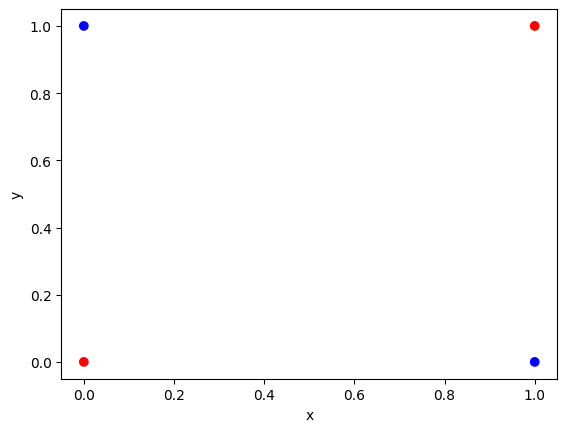

In [22]:
colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(x[:, 0], x[:, 1] , c=colors)
plt.xlabel('x')
plt.ylabel('y')


## Perceptron Model

In [44]:
#(a and b) or nor(a , b) = output

def step_func(z):
    return 1 if (z > 0) else 0

def loss(result, x):
    return result - x

class MLP:
    def __init__(self, epochs, learning_rate):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.randn(3)

    def forward(self, x1, x2):
        # First node: AND
        self.and_node = step_func(self.weights[0] + self.weights[1]*x1 + self.weights[2]*x2)
        # Second node: NOR
        self.nor_node = step_func(self.weights[0] + self.weights[1]*(1-x1) + self.weights[2]*(1-x2))
        # Final node: OR
        self.output = step_func(self.weights[0] + self.weights[1]*self.and_node + self.weights[2]*self.nor_node)
        return self.output

    def update(self, x1, x2, result):
        # Calculate loss
        current_loss = loss(result, self.output)
        # Update weights
        self.weights[0] += self.learning_rate * current_loss
        self.weights[1] += self.learning_rate * current_loss * self.and_node
        self.weights[2] += self.learning_rate * current_loss *  self.nor_node


    def train(self, x_train, y_labels):
        for epoch in range(self.epochs):
            i = 0
            for data in x_train:
                x1 = data[0]
                x2 = data[1]
                result = y_labels[i]
                self.forward(x1, x2)
                self.update(x1, x2, result)
                i += 1


    def predict(self, x1, x2):
        return self.forward(x1, x2)

# Initialize MLP and train it
mlp = MLP(150, 0.1)
mlp.train(x, y)

# Print final weights
print("Final Weights:")
print(mlp.weights)

i = 0
for data in x:

    x1 = data[0]
    x2 = data[1]
    prediction = mlp.predict(x1, x2)
    print(f"Input: ({x1}, {x2}), Label: {y[i]}, Prediction: {prediction}")
    i+=1

Final Weights:
[ 0.08711273 -0.04193251 -0.04792214]
Input: (0, 0), Label: 1, Prediction: 1
Input: (0, 1), Label: 0, Prediction: 0
Input: (1, 0), Label: 0, Prediction: 0
Input: (1, 1), Label: 1, Prediction: 1
